In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv('berkeley23.csv')
x = df['BP-RP']
y = df['Gmag']

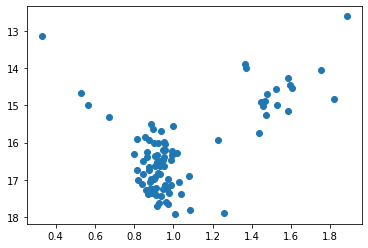

In [3]:
plt.scatter(x,y)
plt.gca().invert_yaxis()

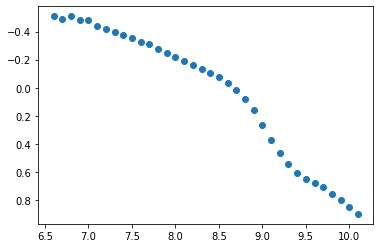

In [4]:
regressoes = pd.read_csv('../Regressoes_Isocronas_Gaia.txt')
plt.scatter(regressoes['Age'],regressoes['(BP-RP)TurnOff'])
plt.gca().invert_yaxis()

In [5]:
hm = np.linspace(np.min(regressoes['(BP-RP)TurnOff']),np.max(regressoes['(BP-RP)TurnOff']), 36)
n = hm[2]-hm[1]
n

0.04019999999999996

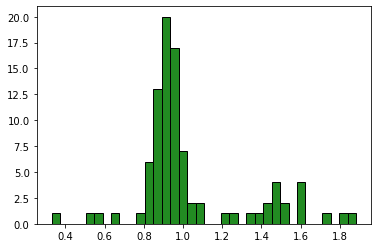

In [6]:
n = 0.04
n_bins = 36#len(np.arange(np.min(regressoes['(BP-RP)TurnOff']),np.max(regressoes['(BP-RP)TurnOff']), n))
cor = 'forestgreen'

fig, ax = plt.subplots()
cor = 'forestgreen'
mx, binsx, patches = ax.hist(x,n_bins, ec = 'k',color = cor)

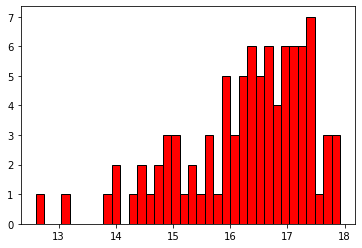

In [7]:
n = 0.04
n_bins = 36#len(np.arange(np.min(regressoes['(BP-RP)TurnOff']),np.max(regressoes['(BP-RP)TurnOff']), n))
cor = 'red'

fig, ax = plt.subplots()
my, binsy, patches = ax.hist(y,n_bins, ec = 'k',color = cor)

In [22]:
numero_pontos_cor, cor = np.histogram(x,n_bins)
cor_turnoff = cor[np.where(numero_pontos_cor >= np.median(numero_pontos_cor))[0]]
cor_turnoff = np.median(cor_turnoff)

In [23]:
locaisx = np.where(x<=cor_turnoff)[0]
locaisx

array([ 1,  2,  3,  5,  6,  8,  9, 11, 12, 13, 14, 15, 17, 18, 19, 20, 21,
       23, 24, 25, 27, 28, 29, 30, 31, 32, 35, 36, 37, 40, 41, 43, 44, 45,
       46, 48, 49, 50, 52, 55, 56, 57, 58, 59, 60, 61, 62, 63, 65, 66, 67,
       68, 69, 70, 72, 73, 74, 75, 76, 77, 78, 80, 81, 82, 84, 85, 86, 87,
       88, 90])

In [24]:
y = np.array(y)
magnitudes = y[locaisx]
magnitudes

array([14.999822 , 16.742613 , 17.0711   , 17.600374 , 17.058401 ,
       15.98417  , 16.979843 , 17.921883 , 17.445583 , 17.16211  ,
       16.32586  , 16.994678 , 16.366516 , 16.400051 , 17.256834 ,
       15.9182205, 16.385193 , 16.319887 , 16.030914 , 17.379463 ,
       15.69506  , 15.649729 , 16.02467  , 15.303565 , 16.25456  ,
       16.284489 , 16.192415 , 16.4965   , 17.284733 , 17.145296 ,
       17.403233 , 17.243101 , 16.809975 , 17.357603 , 16.641548 ,
       17.664816 , 16.522198 , 15.863689 , 16.485466 , 17.369122 ,
       16.859417 , 16.999086 , 17.257149 , 16.34421  , 16.846811 ,
       15.489679 , 16.650574 , 17.11422  , 16.984173 , 17.362122 ,
       16.597004 , 13.135891 , 17.720524 , 17.634092 , 16.643084 ,
       16.727268 , 16.930933 , 16.478079 , 16.226217 , 15.566429 ,
       15.924946 , 16.45776  , 17.26377  , 17.227245 , 16.011356 ,
       16.190424 , 14.679196 , 17.37944  , 16.621605 , 17.13667  ])

In [25]:
def reject_outliers(data, m = 1.):
    d = np.abs(data - np.median(data))
    mdev = np.median(d)
    s = d/mdev if mdev else 0.
    return data[s<m]
magnitudes = reject_outliers(magnitudes)
magnitudes

array([16.742613, 17.0711  , 17.058401, 16.979843, 16.32586 , 16.994678,
       16.366516, 16.400051, 16.385193, 16.319887, 16.25456 , 16.284489,
       16.192415, 16.4965  , 16.809975, 16.641548, 16.522198, 16.485466,
       16.859417, 16.999086, 16.34421 , 16.846811, 16.650574, 17.11422 ,
       16.984173, 16.597004, 16.643084, 16.727268, 16.930933, 16.478079,
       16.226217, 16.45776 , 16.190424, 16.621605, 17.13667 ])

In [26]:
mag_turnoff = np.median(magnitudes)
mag_turnoff

16.621605

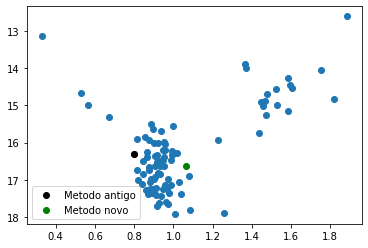

In [27]:
oi = pd.read_csv('regressao_berkeley23.csv')
plt.scatter(oi['TurnOffColor'],oi['TurnOffMag'], color = 'k', zorder = 100, label = 'Metodo antigo')
plt.scatter(x,y)
plt.scatter(cor_turnoff,mag_turnoff,color = 'green', zorder = 100, label = 'Metodo novo')
plt.gca().invert_yaxis()
plt.legend()